# Regression problem with Franke's function

This jupyter notebook shows how we get the results that are presented in the report. 

## Code Structure

- Neural Network 
    - Which parameteres give the best results
    - Final Model
    - Sklearn

Import modules

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from random import random, seed
from pandas import DataFrame
import tqdm as tqdm
import matplotlib.pyplot as plt

#import functions
from functions.neuralnetwork import NeuralNetwork
from functions.functions import *

#Simple filter for sklearn
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#vizualization
import seaborn as sns
sns.set()

Load data

x ranges from 0 to 1 with a total amount of 400 points.
y ranges from 0 to 1 with a total amount of 400 points.


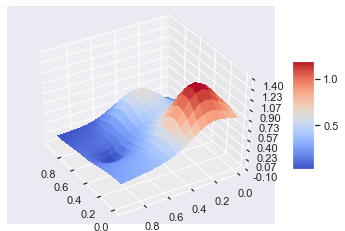

In [2]:
x,y,z = generate_data() #FrankeFunction

Scale the data and split it into training and test data.

In [36]:
x = sigmoid(x)
y = sigmoid(y)
z = sigmoid(z)

x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,random_state=0)

z_train_inv = inv_sigmoid(z_train)
z_test_inv = inv_sigmoid(z_test)

Finding the design matrix with an arbitrary number of polynomial degree.

In [5]:
X_train = find_designmatrix(x_train, y_train, polygrad = 7)

## Neural Network

Building our neural network and giving variables.

In [6]:
n_inputs, n_features = X_train.shape
n_hidden_neurons = 50
n_categories = 1
n_hidden_layers = 2

epochs = 300
batch_size = 100

eta_vals = np.logspace(-5, -2, 4)
lmbd_vals = np.logspace(-8, 0, 9)

train_MSE = np.zeros((len(eta_vals), len(lmbd_vals)))
test_MSE = np.zeros((len(eta_vals), len(lmbd_vals)))

# store the models for later use
DNN_numpy = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

#Finding designmatrix
X_test = find_designmatrix(x_test, y_test, polygrad = 7)


best_data = 0
# grid search
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = NeuralNetwork(X_data = X_train, Y_data = z_train, n_hidden_layers=n_hidden_layers,
                            n_hidden_neurons=n_hidden_neurons, n_categories = n_categories,
                            epochs = epochs, batch_size=batch_size, eta=eta, lmbd=lmbd,
                            user_action = 'regression')
        dnn.train()

        DNN_numpy[i][j] = dnn

        train_pred = dnn.predict_probabilities(X_train)
        test_pred = dnn.predict_probabilities(X_test)

        train_pred = inv_sigmoid(train_pred)
        test_pred = inv_sigmoid(test_pred)


        train_MSE[i][j] = MSE(z_train_inv, train_pred)[0]
        test_MSE[i][j] = MSE(z_test_inv, test_pred)[0]

        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Mean square error on test set:", test_MSE[i][j])
        print()


Learning rate  =  1e-05
Lambda =  1e-08
Mean square error on test set: 0.11008072196015943

Learning rate  =  1e-05
Lambda =  1e-07
Mean square error on test set: 0.09340828411701128

Learning rate  =  1e-05
Lambda =  1e-06
Mean square error on test set: 0.1872380479914998

Learning rate  =  1e-05
Lambda =  1e-05
Mean square error on test set: 0.11204196885593669

Learning rate  =  1e-05
Lambda =  0.0001
Mean square error on test set: 0.2831198964853396

Learning rate  =  1e-05
Lambda =  0.001
Mean square error on test set: 0.3254299927688685

Learning rate  =  1e-05
Lambda =  0.01
Mean square error on test set: 0.19720065232985967

Learning rate  =  1e-05
Lambda =  0.1
Mean square error on test set: 0.05211397762967454

Learning rate  =  1e-05
Lambda =  1.0
Mean square error on test set: 0.14493805765007775

Learning rate  =  0.0001
Lambda =  1e-08
Mean square error on test set: 0.045954225190281334

Learning rate  =  0.0001
Lambda =  1e-07
Mean square error on test set: 0.18140331749

Now we would like to plot our results.

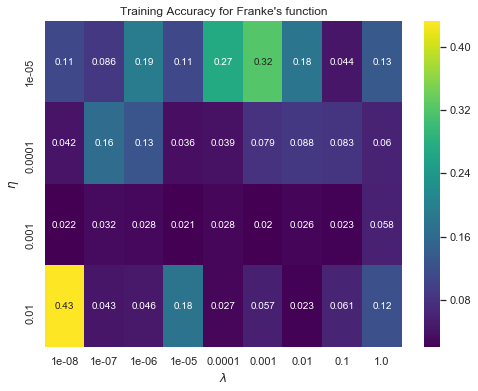

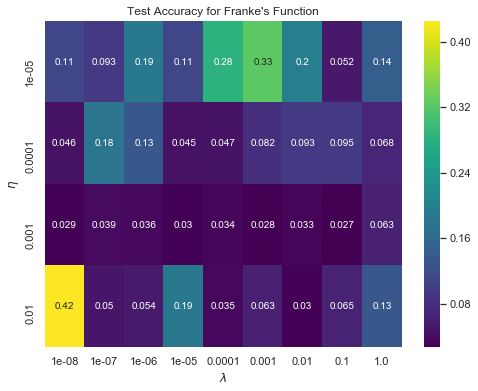

In [7]:
train_accuracy = DataFrame(train_MSE, index = eta_vals, columns = lmbd_vals)

fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy for Franke's function")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

test_accuracy = DataFrame(test_MSE, index = eta_vals, columns = lmbd_vals)

fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy for Franke's Function")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## But which parameters give the best results? 

We will run the same programs as above, but this time we will change the parameters to try and find the optimal model, even though the test set is already delievering quite good results.

In [11]:
n_inputs, n_features = X_train.shape
n_hidden_neurons = 50
n_categories = 1
n_hidden_layers = 2

epochs = 300
batch_size = 100

eta_vals = np.logspace(-5, -2, 4)
lmbd_vals = np.logspace(-8, 0, 9)

train_MSE = np.zeros((len(eta_vals), len(lmbd_vals)))
test_MSE = np.zeros((len(eta_vals), len(lmbd_vals)))

R2_score = np.zeros((len(eta_vals), len(lmbd_vals)))
# store the models for later use
DNN_numpy = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)



In [73]:
def run_neuralnetwork(printing = False):
    train_MSE = np.zeros((len(eta_vals), len(lmbd_vals)))
    test_MSE = np.zeros((len(eta_vals), len(lmbd_vals)))
    R2_score = np.zeros((len(eta_vals), len(lmbd_vals)))
    best_R2_score = 0
    for i, eta in enumerate(eta_vals):
        for j, lmbd in enumerate(lmbd_vals):
            dnn = NeuralNetwork(X_data = X_train, Y_data = z_train, n_hidden_layers=n_hidden_layers,
                            n_hidden_neurons=n_hidden_neurons, n_categories = n_categories,
                            epochs = epochs, batch_size=batch_size, eta=eta, lmbd=lmbd,
                            user_action = 'regression')
            dnn.train()

            DNN_numpy[i][j] = dnn

            train_pred = dnn.predict_probabilities(X_train)
            test_pred = dnn.predict_probabilities(X_test)

            train_pred_inv = inv_sigmoid(train_pred)
            test_pred_inv = inv_sigmoid(test_pred)


            train_MSE[i][j] = MSE(z_train_inv, train_pred_inv)[0]
            test_MSE[i][j] = MSE(z_test_inv, test_pred_inv)[0]
            
            R2_score[i][j] = R2(z_test_inv.reshape(z_test_inv.shape[0],1), test_pred_inv)
            
            if printing:
                print("Learning rate  = ", eta)
                print("Lambda = ", lmbd)
                print("Mean square error on test set:", test_MSE[i][j])
                print()
            #print (R2_score[i][j])
            if R2_score[i][j]  > best_R2_score:
                best_R2_score = R2_score[i][j]
                best_eta = eta 
                best_lmdb = lmbd
    
    train_accuracy = DataFrame(train_MSE, index = eta_vals, columns = lmbd_vals)

    fig, ax = plt.subplots(figsize = (8, 6))
    sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
    ax.set_title("Training Accuracy for Franke's function")
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$\lambda$")
    #plt.savefig("plots/regression/nn_regression_train_heatmap_%i.pdf"%(epochs))
    plt.show()

    test_accuracy = DataFrame(test_MSE, index = eta_vals, columns = lmbd_vals)

    fig, ax = plt.subplots(figsize = (8, 6))
    sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
    ax.set_title("Test Accuracy for Franke's Function")
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$\lambda$")
    #plt.savefig("plots/regression/nn_regression_test_heatmap_%i.pdf"%(epochs))
    plt.show()
    
    print ("Best R$^2$ score is:", best_R2_score)
    print ("With lmbd equal:", best_lmdb)
    print ("With eta equal:", best_eta)



How much does the accuracy change by variating the degree of the design matrix? 

  0%|          | 0/9 [00:00<?, ?it/s]

Number of polynomial degree: 1


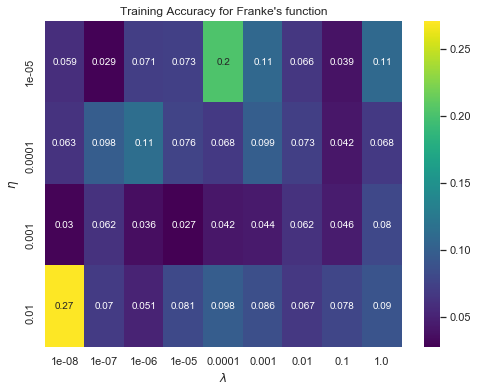

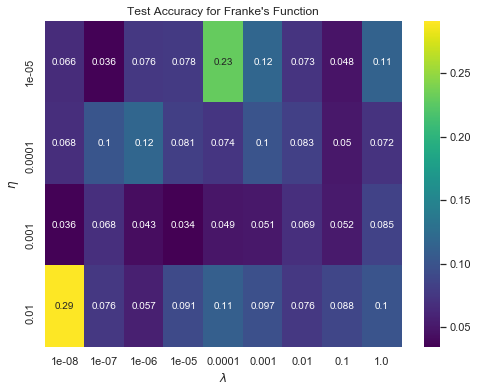

 11%|█         | 1/9 [00:32<04:16, 32.02s/it]

Number of polynomial degree: 2


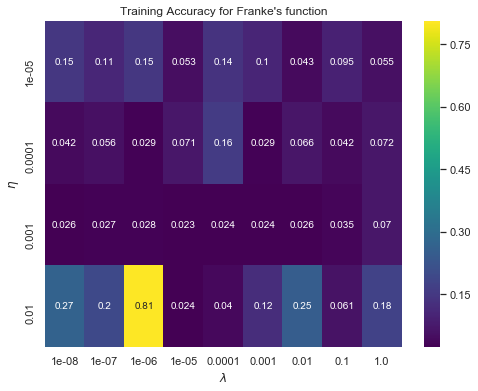

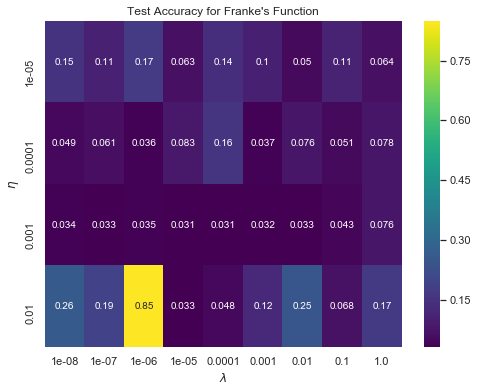

 22%|██▏       | 2/9 [01:13<04:03, 34.79s/it]

Number of polynomial degree: 3


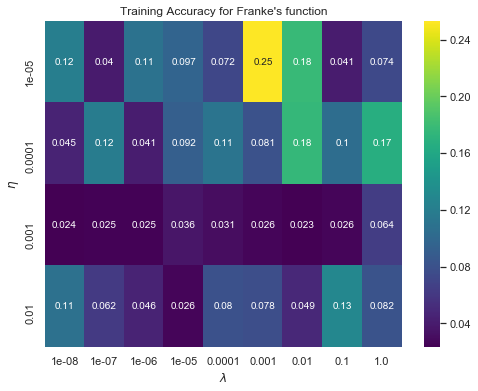

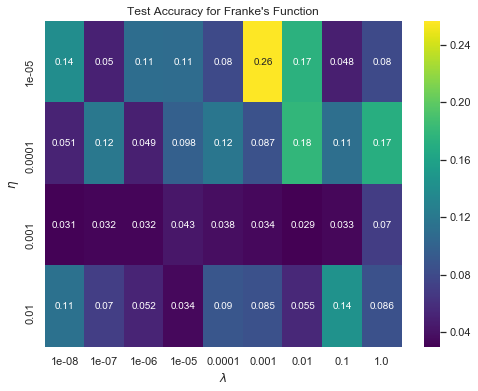

 33%|███▎      | 3/9 [01:55<03:41, 36.94s/it]

Number of polynomial degree: 4


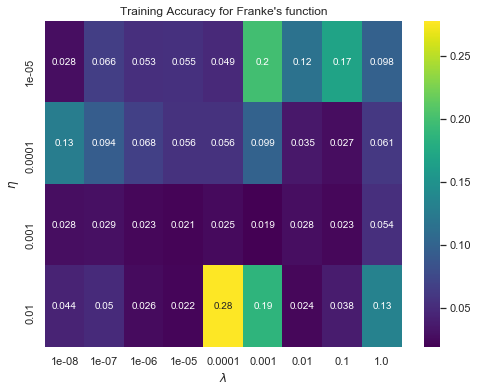

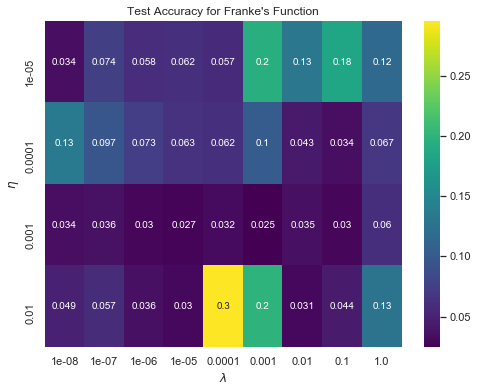

 44%|████▍     | 4/9 [02:34<03:08, 37.65s/it]

Number of polynomial degree: 5


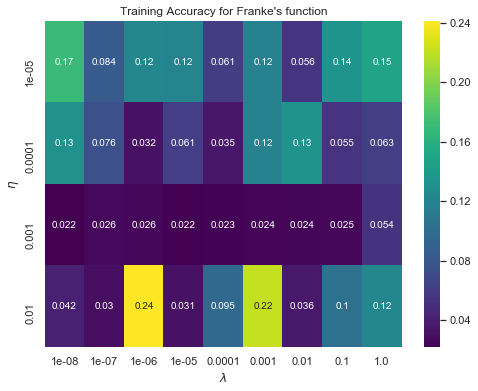

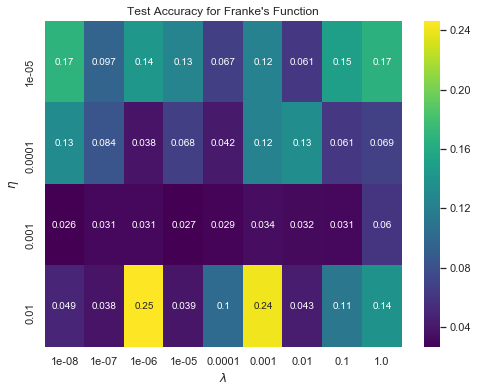

 56%|█████▌    | 5/9 [03:11<02:29, 37.37s/it]

Number of polynomial degree: 6


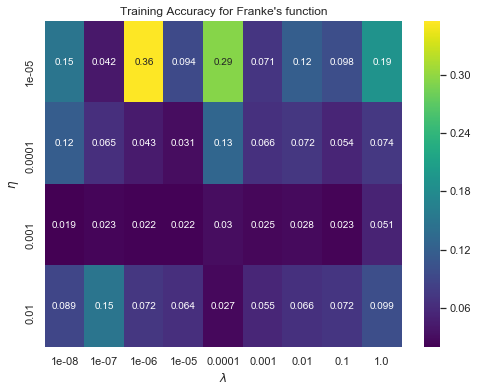

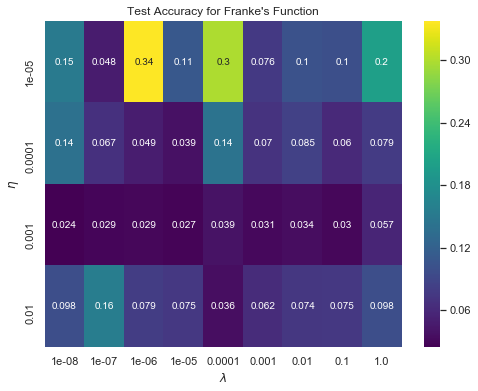

 67%|██████▋   | 6/9 [03:47<01:51, 37.16s/it]

Number of polynomial degree: 7


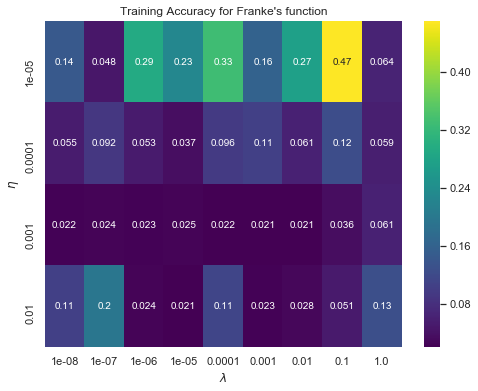

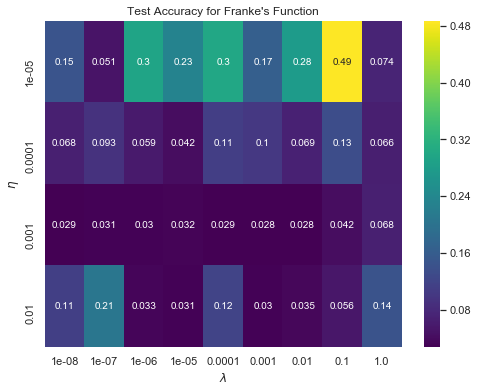

 78%|███████▊  | 7/9 [04:36<01:21, 40.62s/it]

Number of polynomial degree: 8


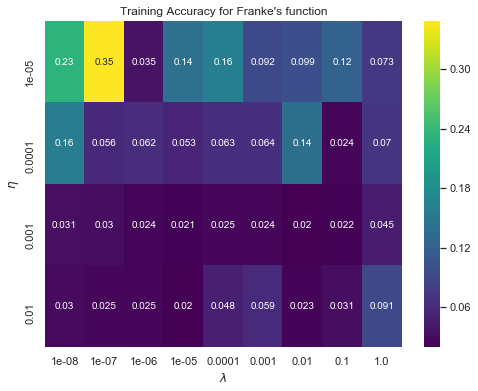

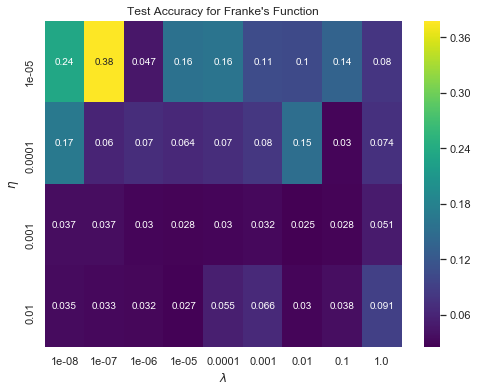

 89%|████████▉ | 8/9 [05:15<00:40, 40.20s/it]

Number of polynomial degree: 9


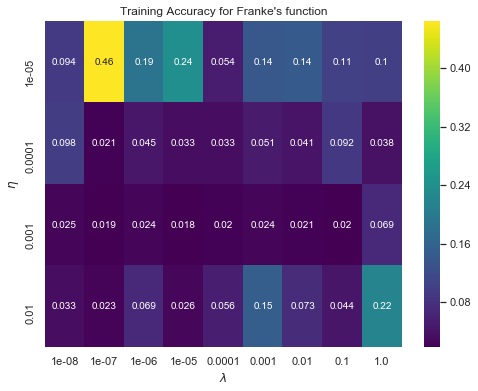

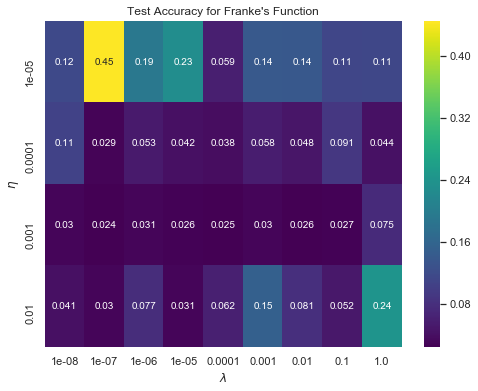

100%|██████████| 9/9 [05:58<00:00, 39.81s/it]


In [10]:

for polydegree in tqdm.tqdm(range(1,10)):
    print ("Number of polynomial degree:", polydegree)
    X_test = find_designmatrix(x_test, y_test, polygrad = polydegree)
    X_train = find_designmatrix(x_train, y_train, polygrad = polydegree)
    n_inputs, n_features = X_train.shape
    run_neuralnetwork()

Thus, we see by having a polynomial degree of $6$ we will increase the accuracy as the smallest MSE was found to be $0.026$. 

Can we improve the accuracy by changing the parameters? Let's start with number of hidden layers.

  0%|          | 0/6 [00:00<?, ?it/s]

Number of hidden layers: 1


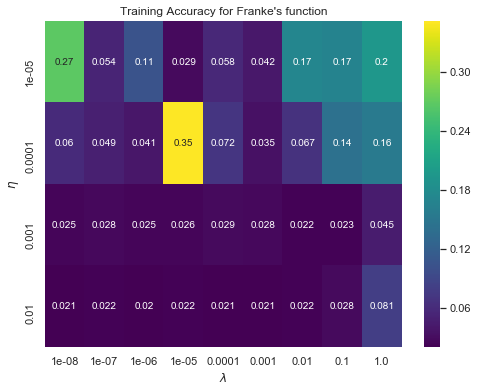

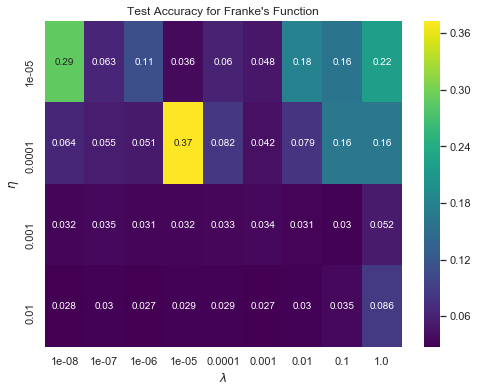

 17%|█▋        | 1/6 [00:19<01:38, 19.72s/it]

Number of hidden layers: 2


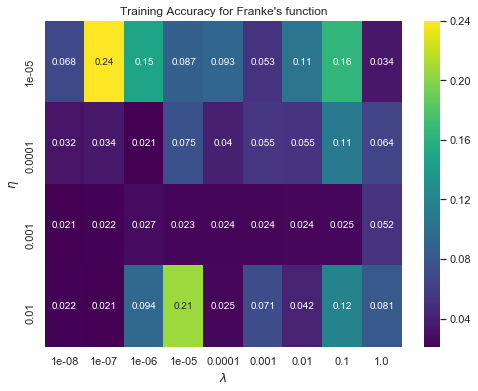

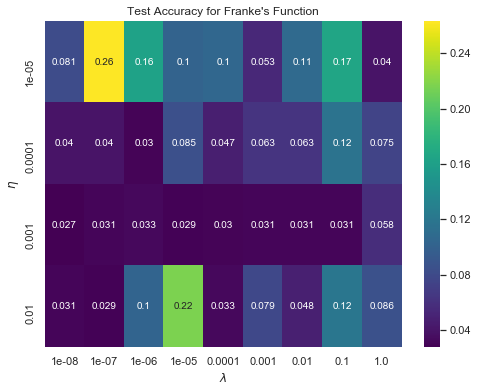

 33%|███▎      | 2/6 [00:55<01:38, 24.66s/it]

Number of hidden layers: 3


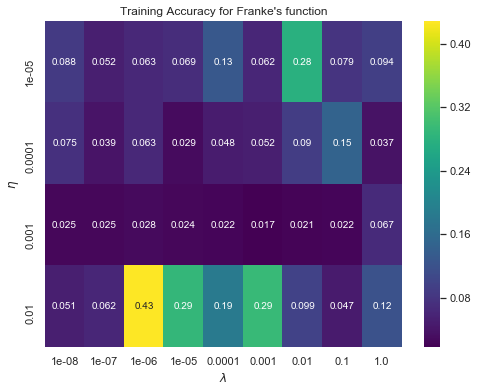

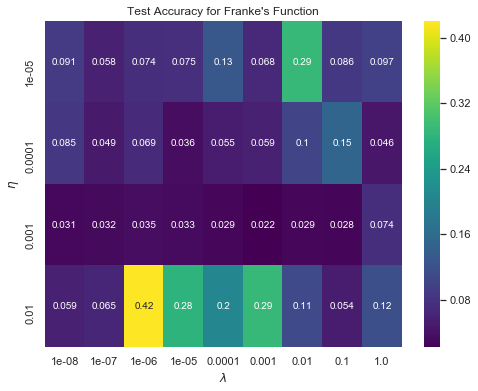

 50%|█████     | 3/6 [01:43<01:34, 31.62s/it]

Number of hidden layers: 4


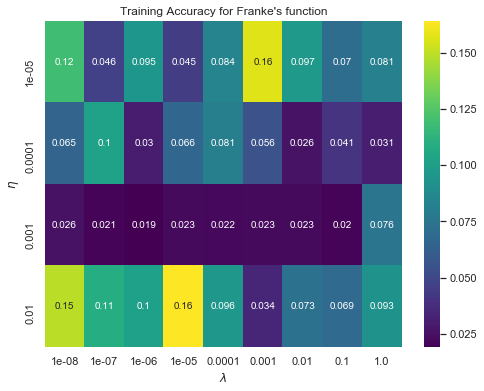

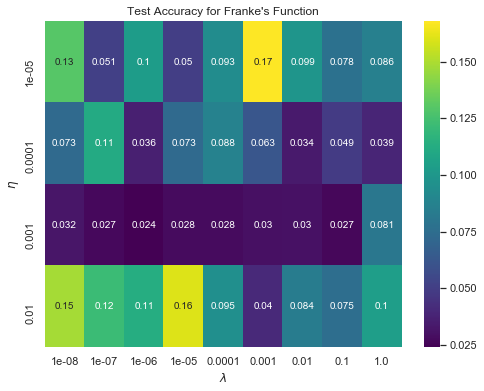

 67%|██████▋   | 4/6 [02:39<01:17, 38.89s/it]

Number of hidden layers: 5


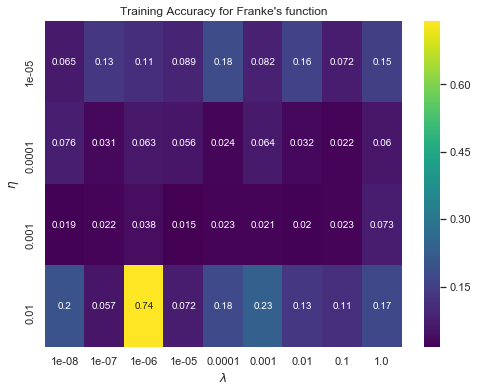

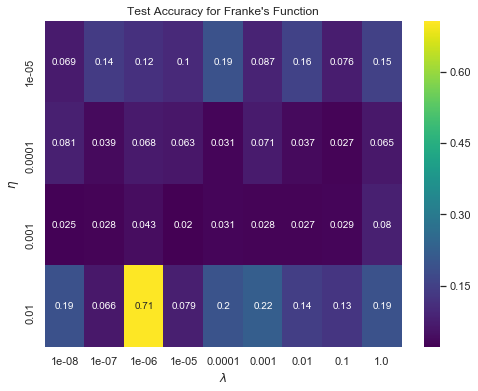

 83%|████████▎ | 5/6 [03:53<00:49, 49.47s/it]

Number of hidden layers: 6


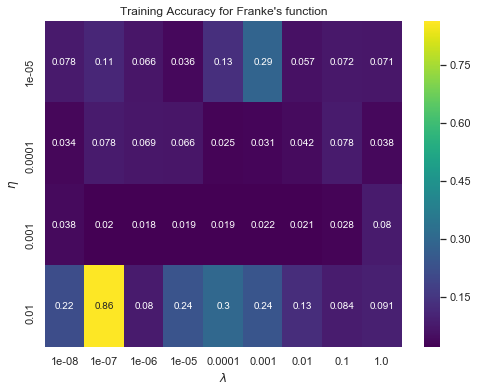

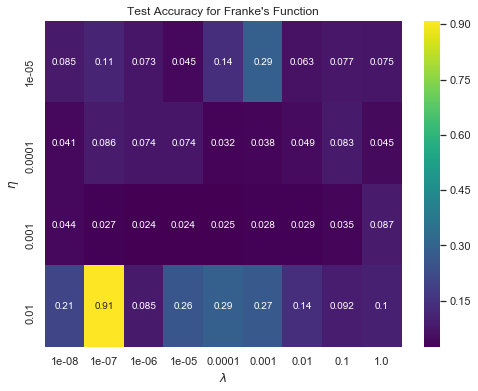

100%|██████████| 6/6 [05:18<00:00, 53.09s/it]


In [11]:
X_test = find_designmatrix(x_test, y_test, polygrad = 6)
X_train = find_designmatrix(x_train, y_train, polygrad = 6)    
n_inputs, n_features = X_train.shape
for n_hidden_layers in tqdm.tqdm(range(1,7)):
    print ("Number of hidden layers:", n_hidden_layers)
    run_neuralnetwork()

For this run it was found a MSE $= 0.02$ for $5$ hidden layers. 

  0%|          | 0/14 [00:00<?, ?it/s]

Number of neurons to each hidden layer: 10


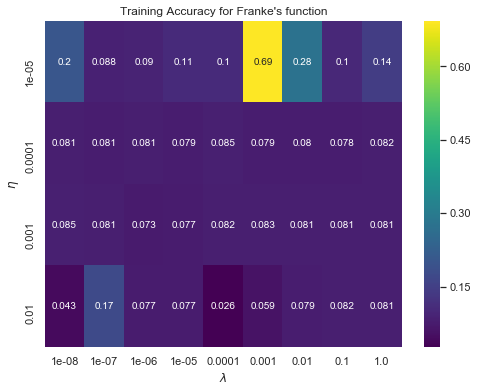

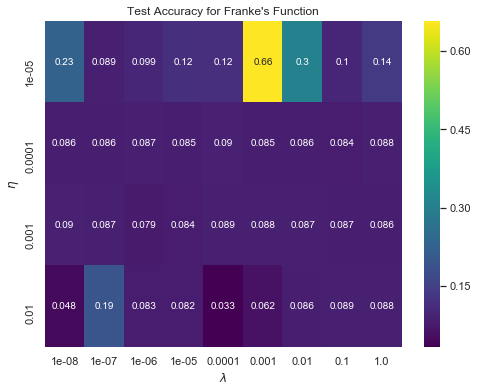

  7%|▋         | 1/14 [00:31<06:51, 31.62s/it]

Number of neurons to each hidden layer: 20


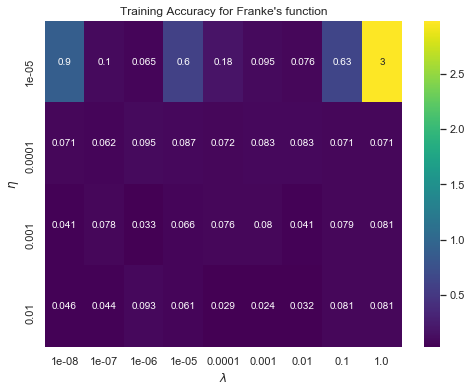

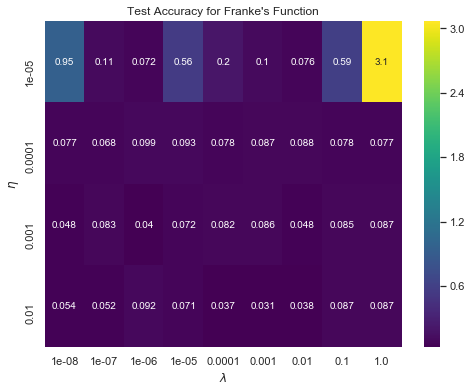

 14%|█▍        | 2/14 [01:09<06:43, 33.63s/it]

Number of neurons to each hidden layer: 30


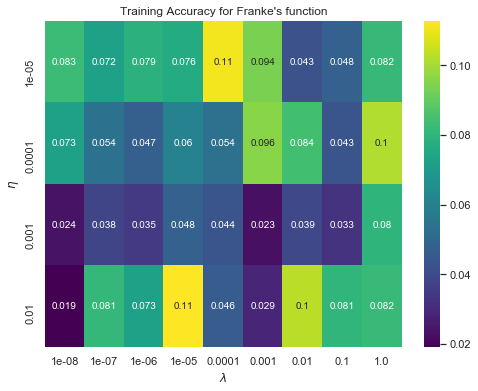

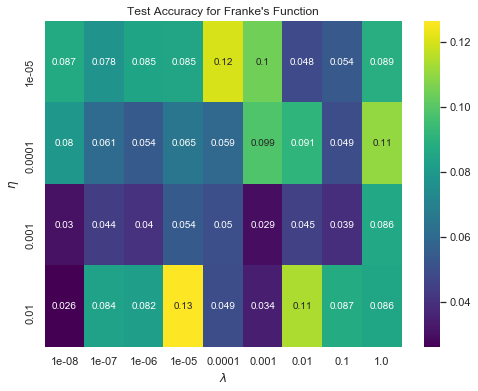

 21%|██▏       | 3/14 [01:59<07:03, 38.46s/it]

Number of neurons to each hidden layer: 40


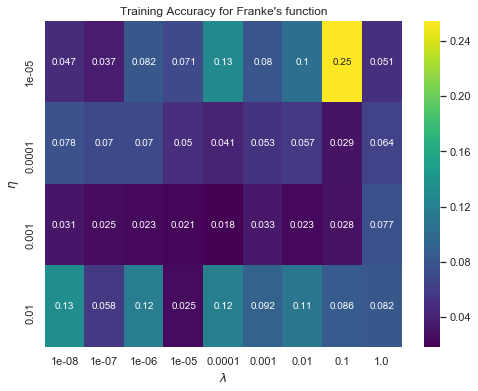

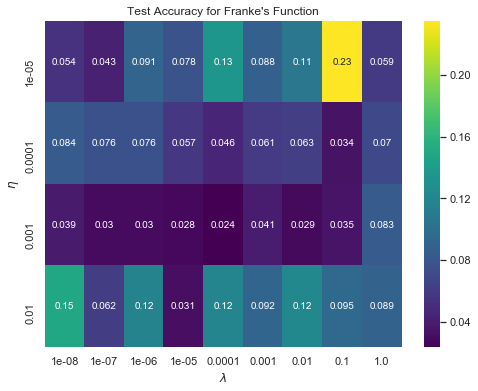

 29%|██▊       | 4/14 [02:54<07:14, 43.45s/it]

Number of neurons to each hidden layer: 50


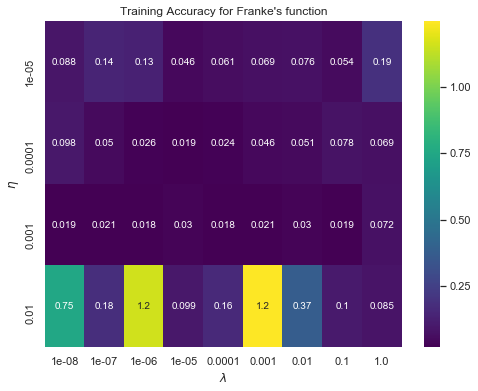

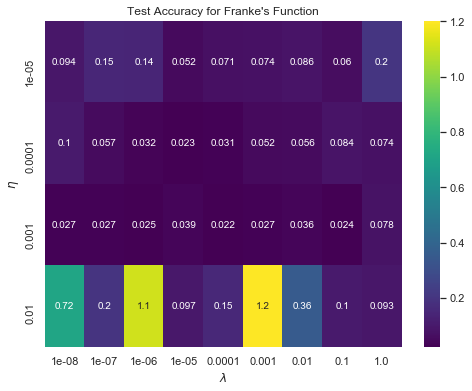

 36%|███▌      | 5/14 [03:55<07:17, 48.64s/it]

Number of neurons to each hidden layer: 60


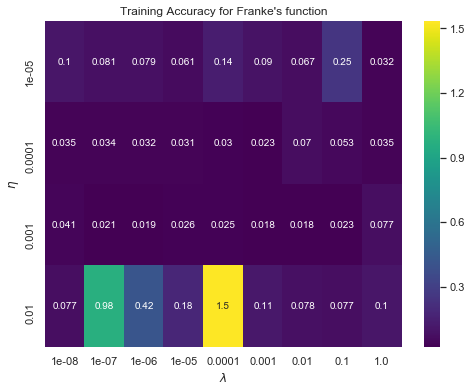

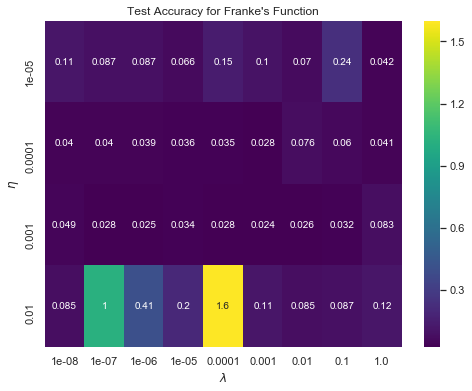

 43%|████▎     | 6/14 [05:04<07:18, 54.79s/it]

Number of neurons to each hidden layer: 70


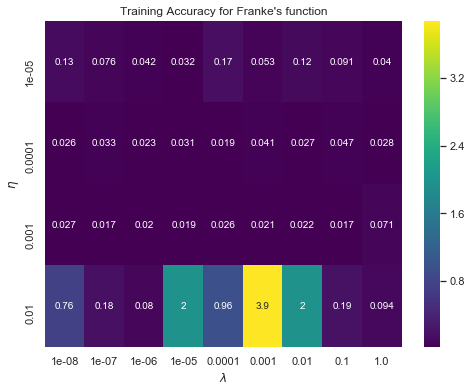

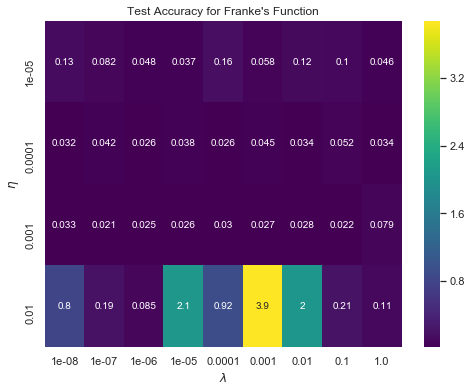

 50%|█████     | 7/14 [06:33<07:35, 65.06s/it]

Number of neurons to each hidden layer: 80


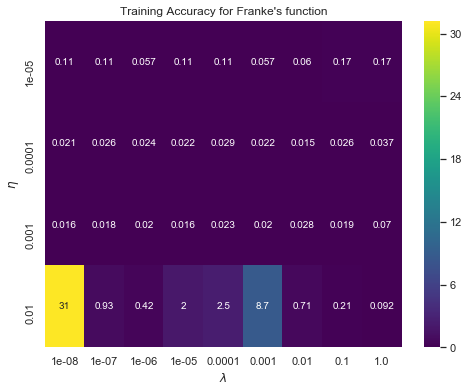

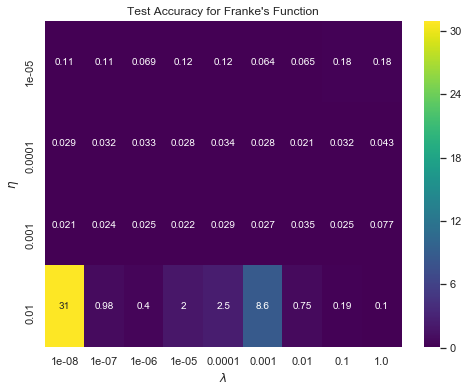

 57%|█████▋    | 8/14 [08:06<07:21, 73.50s/it]

Number of neurons to each hidden layer: 90


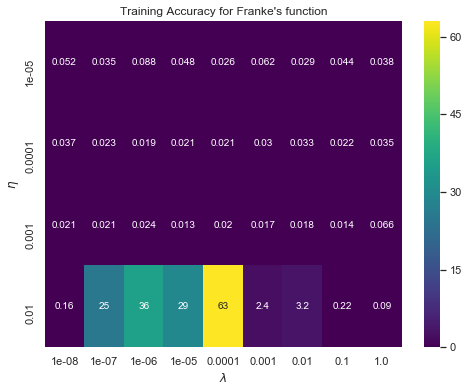

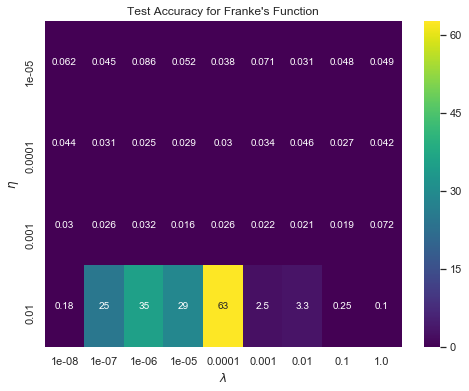

 64%|██████▍   | 9/14 [09:58<07:03, 84.79s/it]

Number of neurons to each hidden layer: 100


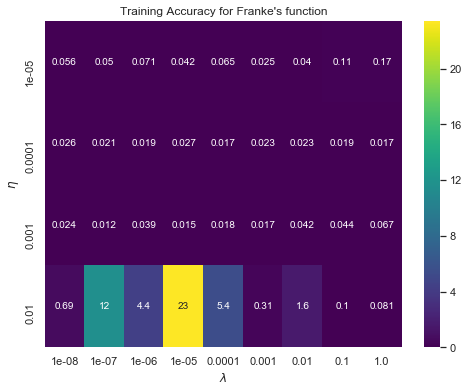

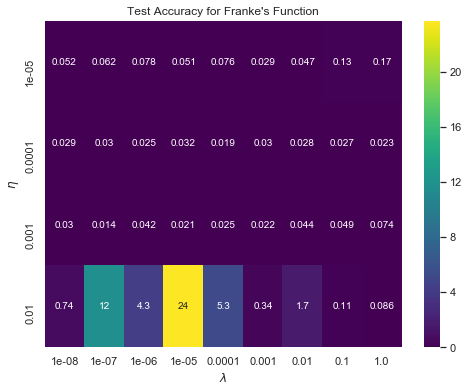

 71%|███████▏  | 10/14 [11:55<06:18, 94.55s/it]

Number of neurons to each hidden layer: 110


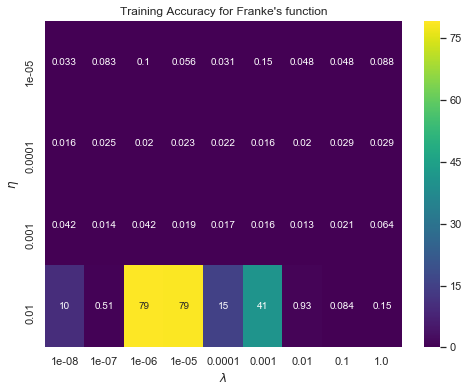

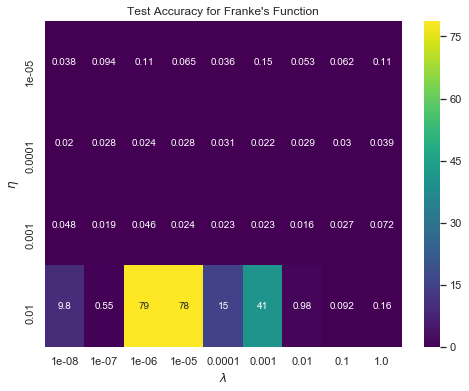

 79%|███████▊  | 11/14 [14:08<05:18, 106.17s/it]

Number of neurons to each hidden layer: 120


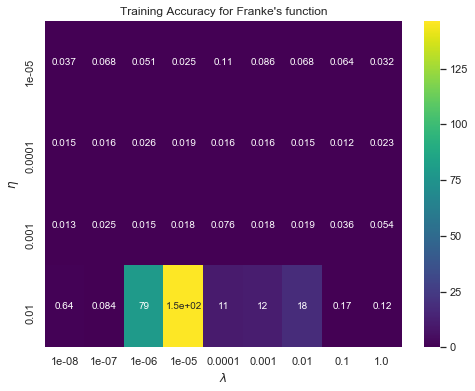

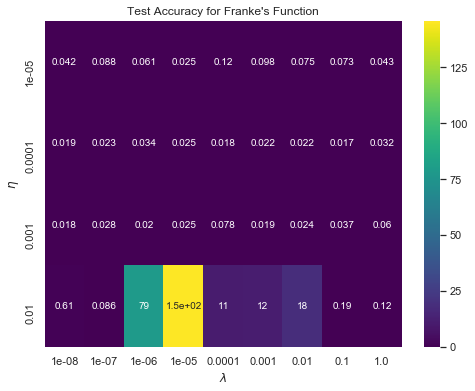

 86%|████████▌ | 12/14 [16:39<03:59, 119.62s/it]

Number of neurons to each hidden layer: 130


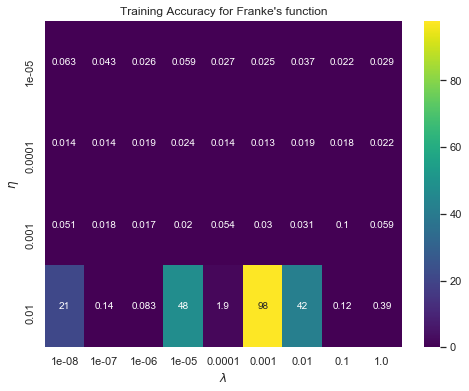

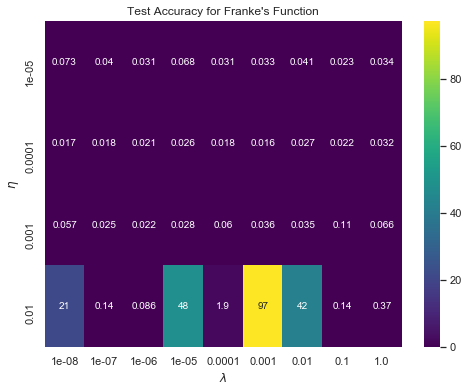

 93%|█████████▎| 13/14 [19:03<02:06, 126.77s/it]

Number of neurons to each hidden layer: 140


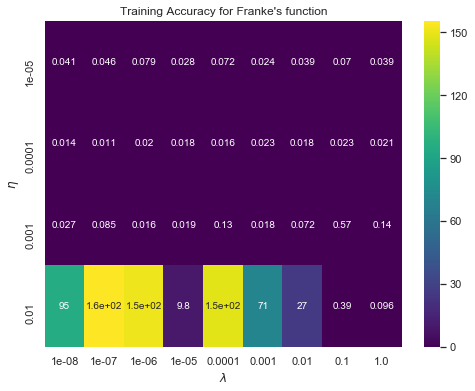

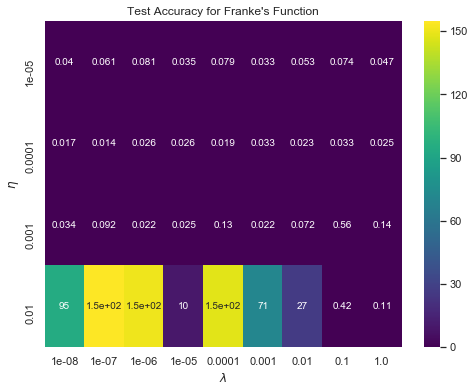

100%|██████████| 14/14 [21:48<00:00, 93.48s/it] 


In [13]:
n_hidden_layers = 5
for n_hidden_neurons in tqdm.tqdm(range(10,150,10)):
    print ("Number of neurons to each hidden layer:", n_hidden_neurons)
    run_neuralnetwork()

For this it was found MSE as $0.014$ when using both 100 and 140 neurons for each hidden layer, which is indeed a good improvement. We will continue with $100$ neurons, as this requires less computational power. 

  0%|          | 0/19 [00:00<?, ?it/s]

Number of batch_size: 10


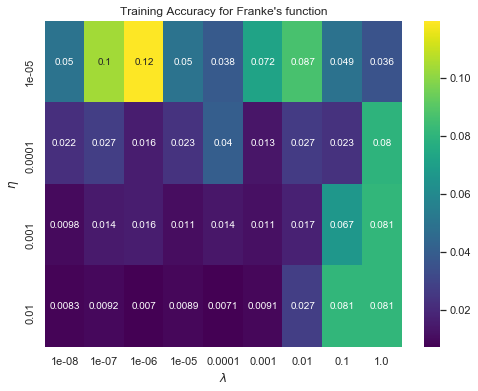

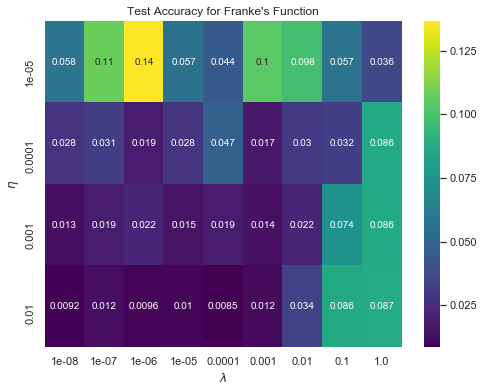

  5%|▌         | 1/19 [07:28<2:14:31, 448.43s/it]

Number of batch_size: 20


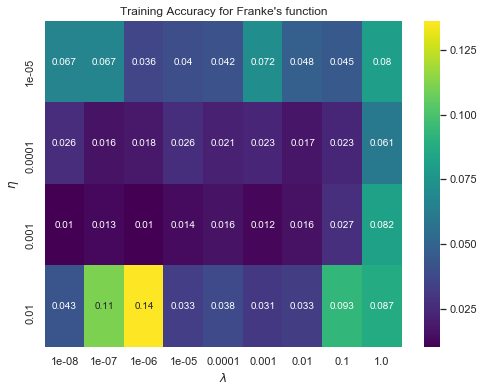

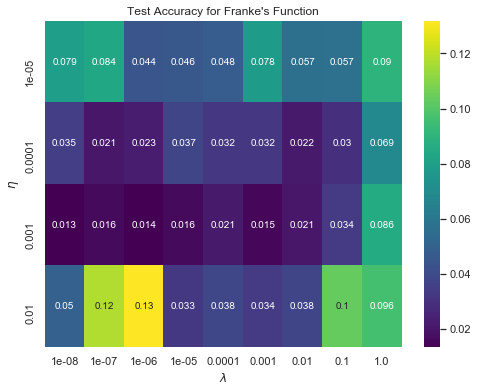

 11%|█         | 2/19 [11:47<1:50:59, 391.73s/it]

Number of batch_size: 30


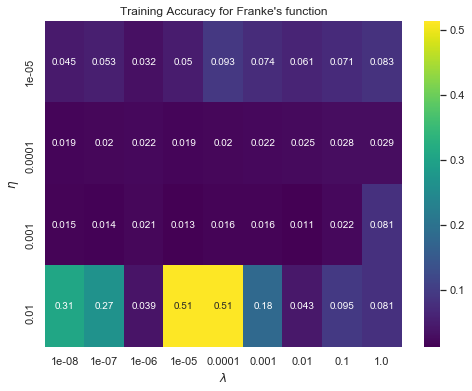

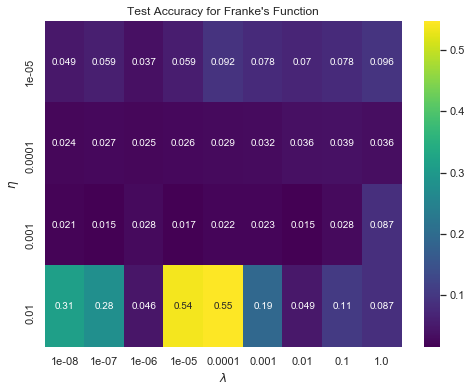

 16%|█▌        | 3/19 [15:02<1:28:39, 332.48s/it]

Number of batch_size: 40


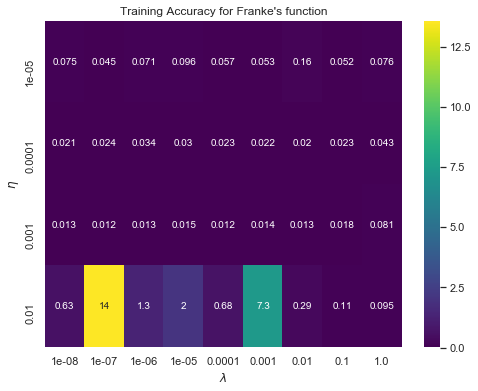

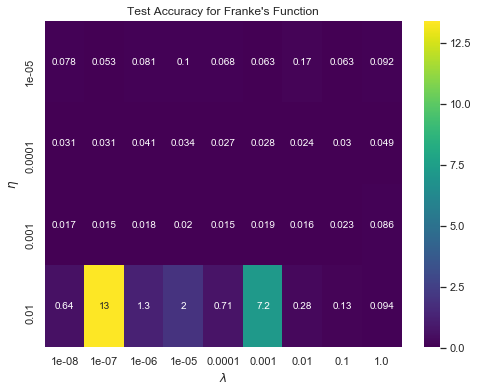

 21%|██        | 4/19 [17:43<1:10:17, 281.16s/it]

Number of batch_size: 50


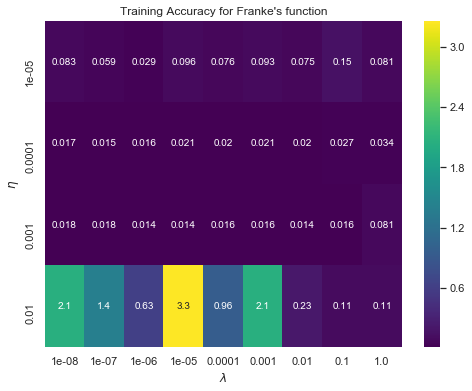

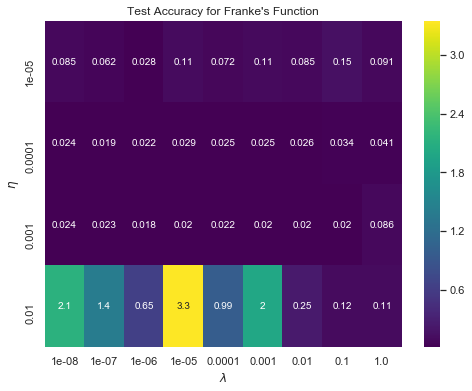

 26%|██▋       | 5/19 [20:25<57:15, 245.37s/it]  

Number of batch_size: 60


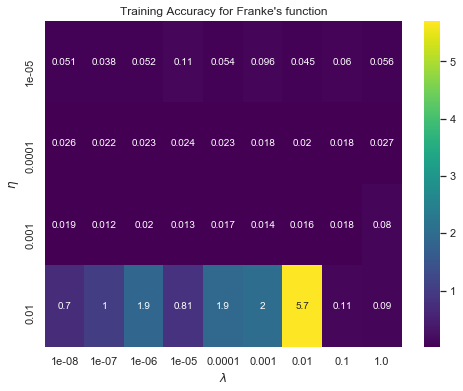

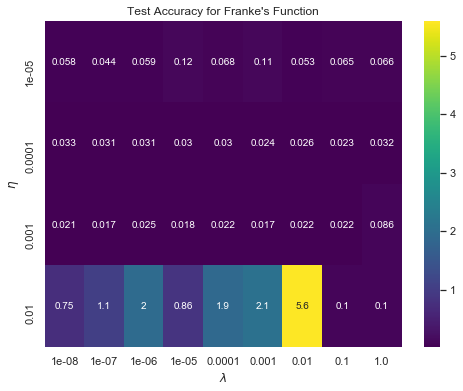

 32%|███▏      | 6/19 [22:55<46:57, 216.70s/it]

Number of batch_size: 70


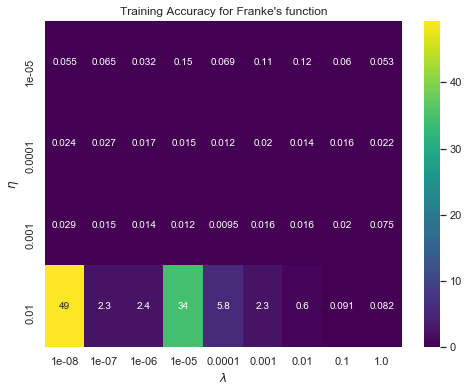

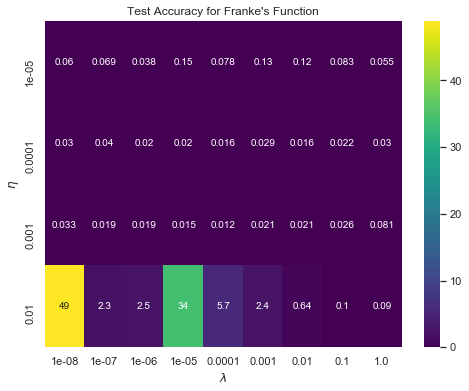

 37%|███▋      | 7/19 [25:11<38:31, 192.59s/it]

Number of batch_size: 80


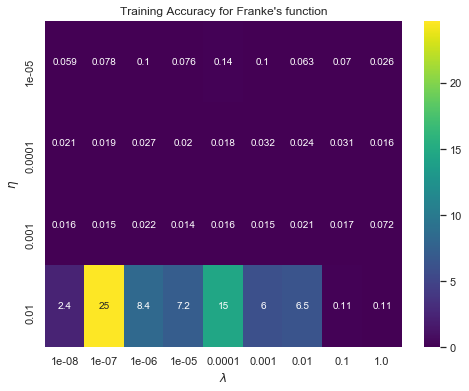

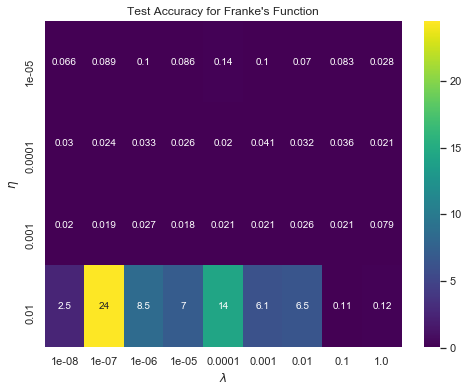

 42%|████▏     | 8/19 [26:55<30:27, 166.16s/it]

Number of batch_size: 90


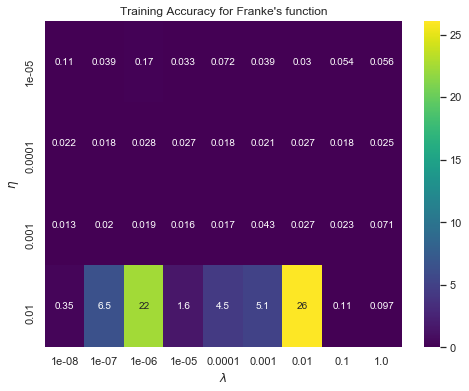

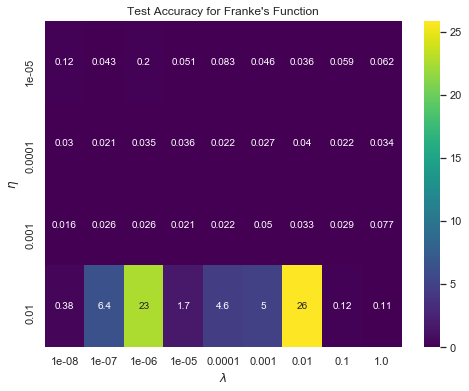

 47%|████▋     | 9/19 [28:38<24:31, 147.19s/it]

Number of batch_size: 100


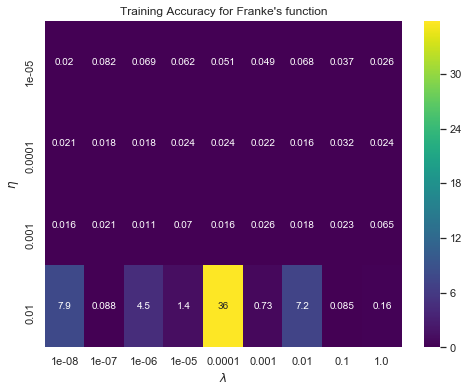

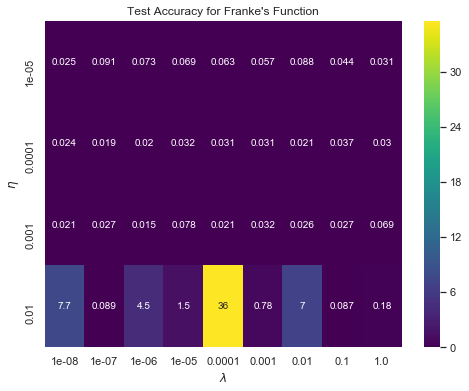

 53%|█████▎    | 10/19 [30:34<20:38, 137.58s/it]

Number of batch_size: 110


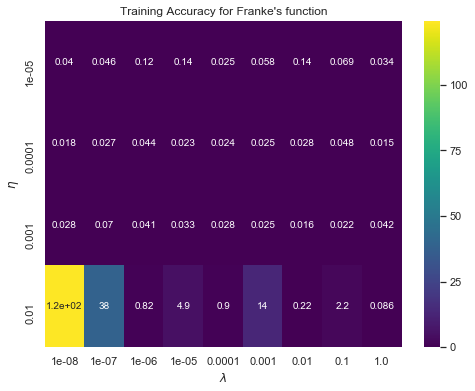

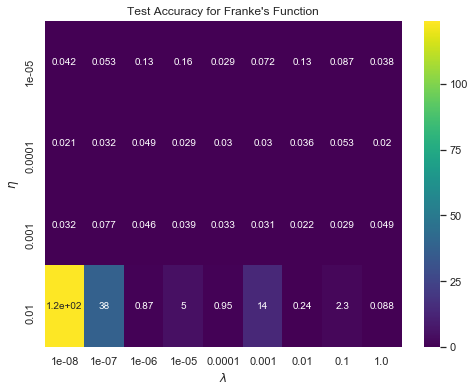

 58%|█████▊    | 11/19 [31:52<15:59, 119.93s/it]

Number of batch_size: 120


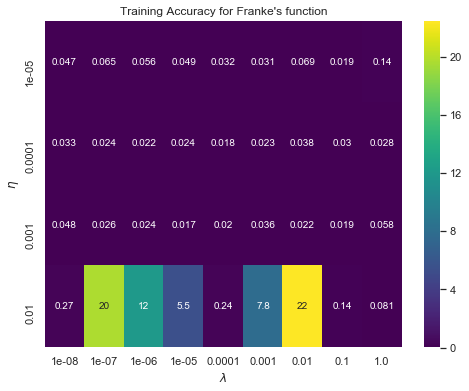

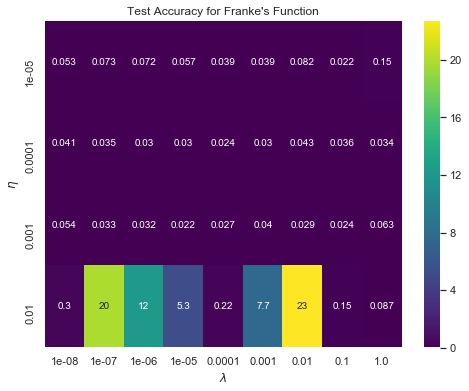

 63%|██████▎   | 12/19 [33:20<12:52, 110.30s/it]

Number of batch_size: 130


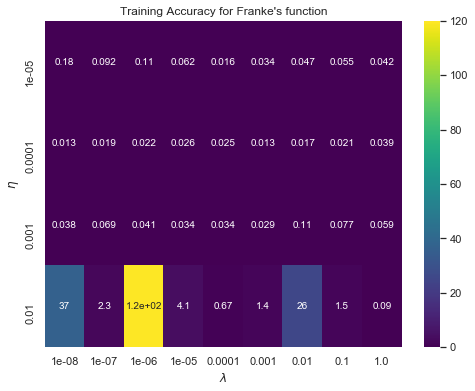

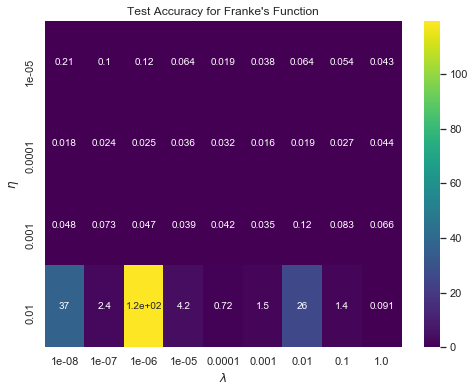

 68%|██████▊   | 13/19 [34:52<10:28, 104.68s/it]

Number of batch_size: 140


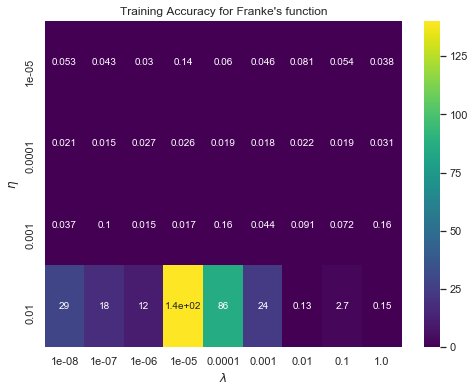

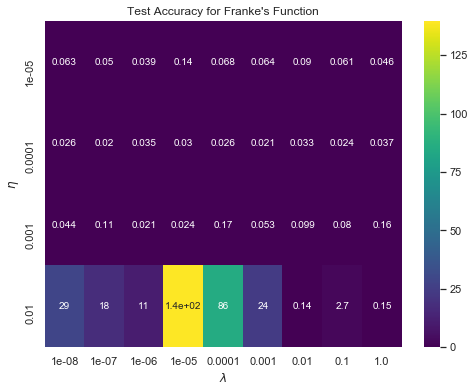

 74%|███████▎  | 14/19 [36:28<08:30, 102.17s/it]

Number of batch_size: 150


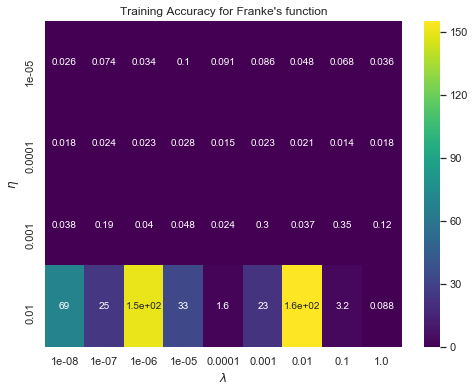

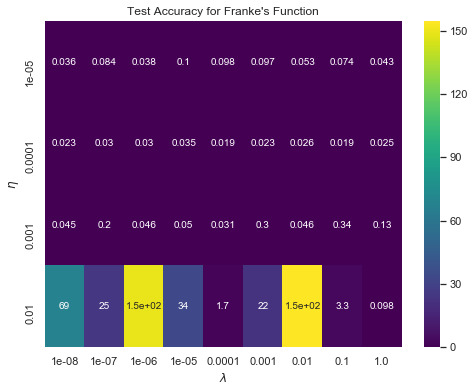

 79%|███████▉  | 15/19 [38:08<06:46, 101.55s/it]

Number of batch_size: 160


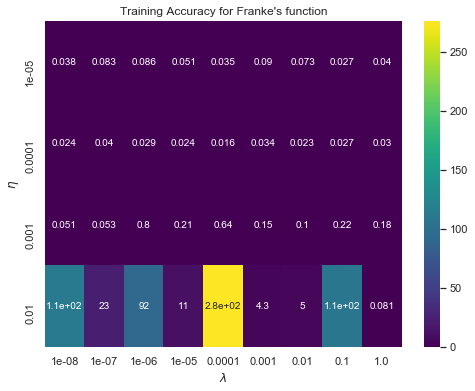

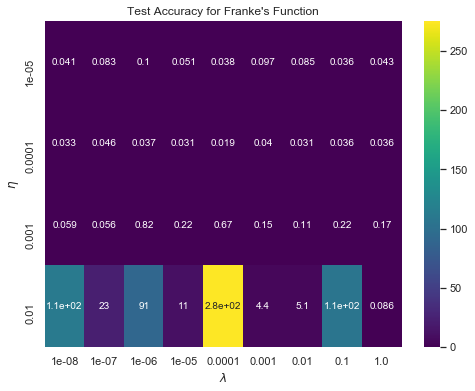

 84%|████████▍ | 16/19 [39:04<04:23, 87.73s/it] 

Number of batch_size: 170


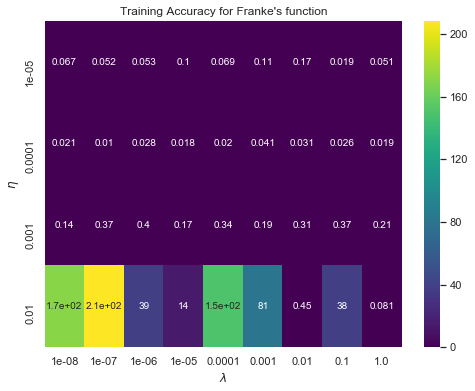

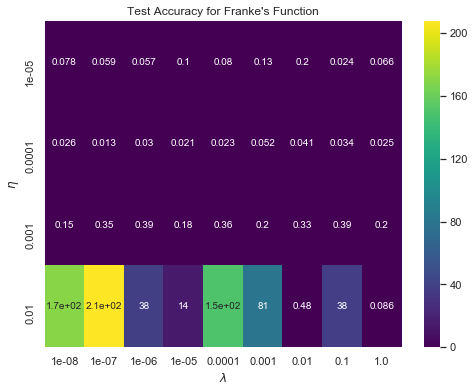

 89%|████████▉ | 17/19 [40:00<02:36, 78.40s/it]

Number of batch_size: 180


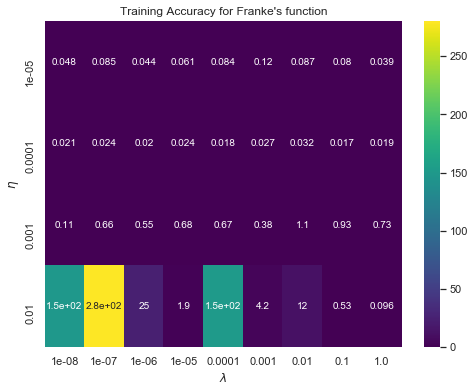

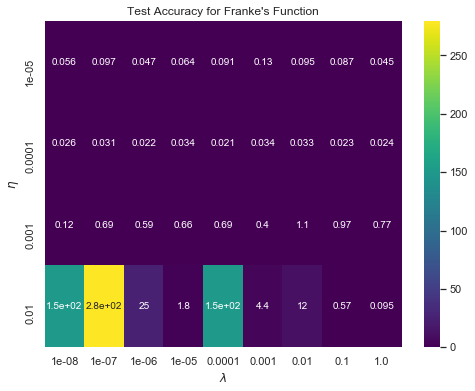

 95%|█████████▍| 18/19 [41:01<01:13, 73.14s/it]

Number of batch_size: 190


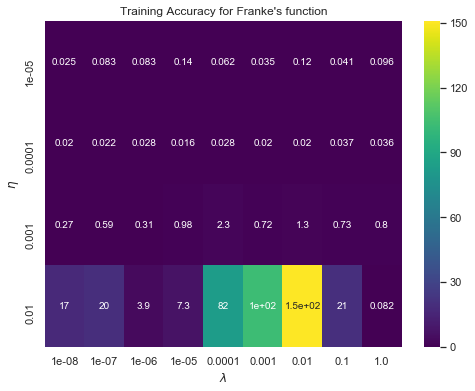

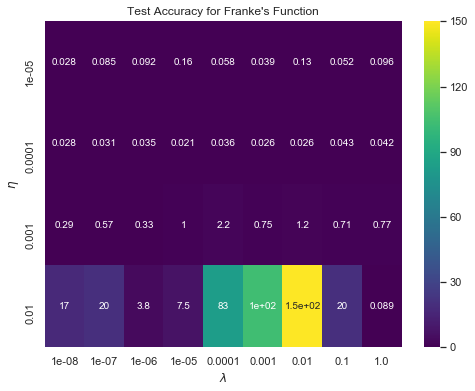

100%|██████████| 19/19 [42:04<00:00, 132.89s/it]


In [15]:
n_hidden_neurons = 100
for batch_size in tqdm.tqdm(range(10,200,10)):
    print ("Number of batch_size:", batch_size)
    run_neuralnetwork()

It was achieved MSE equal to $0.0085$ for batch size 10. 




  0%|          | 0/19 [00:00<?, ?it/s]

Number of epochs: 10


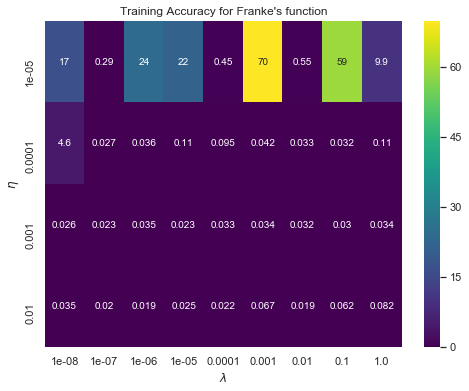

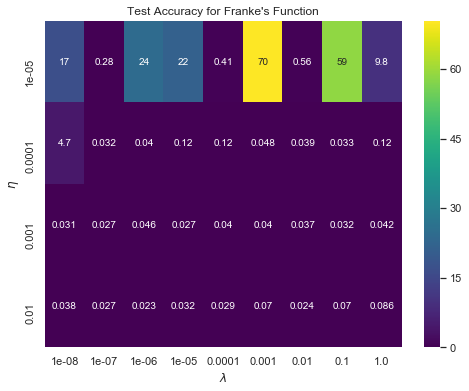




  5%|▌         | 1/19 [00:17<05:08, 17.14s/it]

Number of epochs: 20


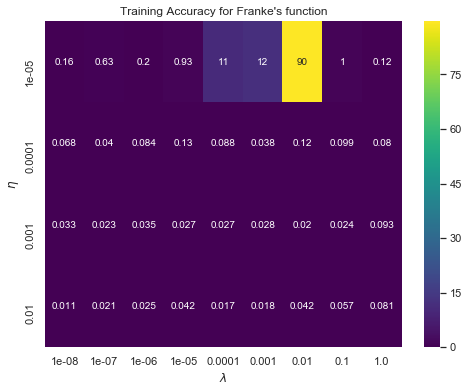

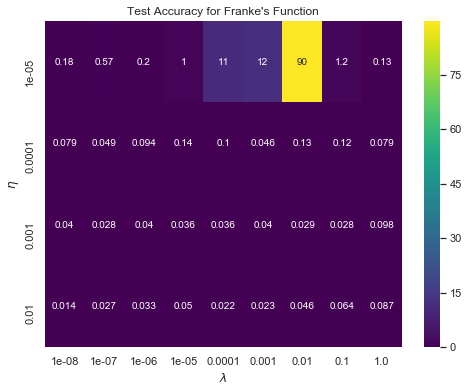




 11%|█         | 2/19 [00:51<06:19, 22.32s/it]

Number of epochs: 30


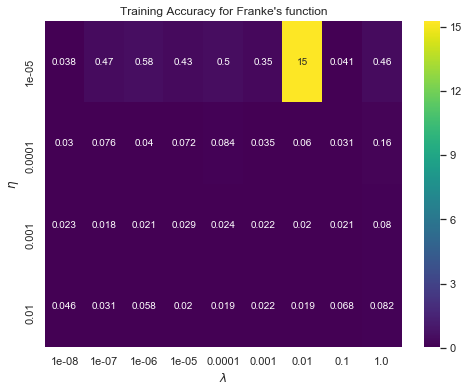

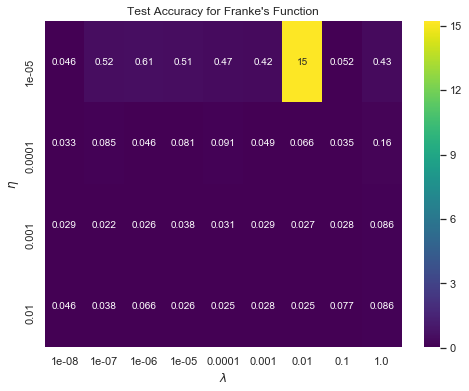




 16%|█▌        | 3/19 [01:40<08:05, 30.31s/it]

Number of epochs: 40


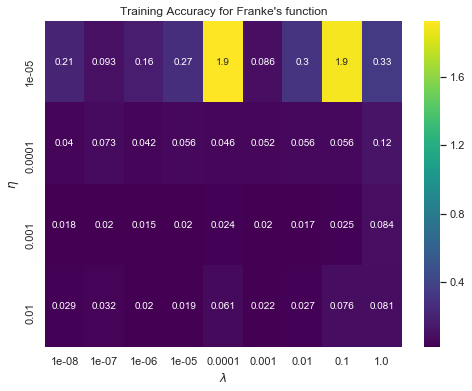

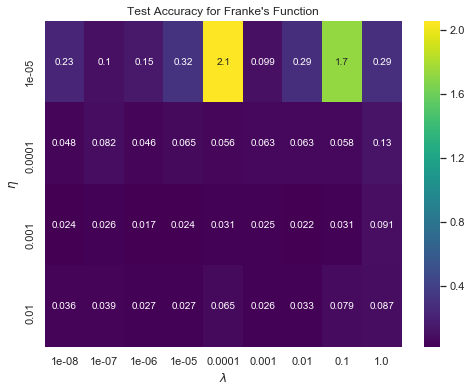




 21%|██        | 4/19 [02:37<09:35, 38.34s/it]

Number of epochs: 50


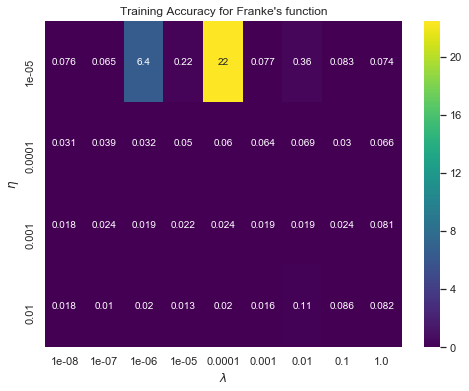

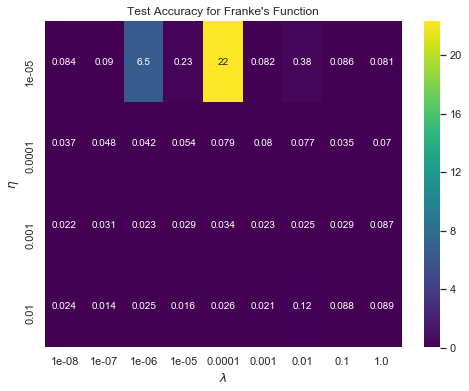




 26%|██▋       | 5/19 [03:49<11:15, 48.28s/it]

Number of epochs: 60


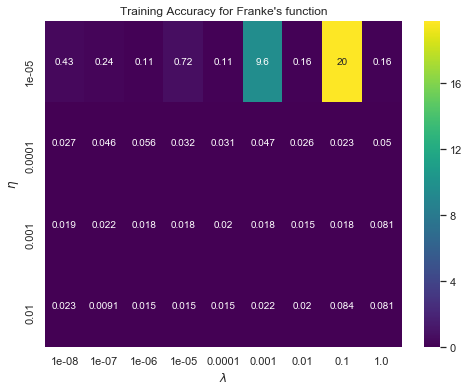

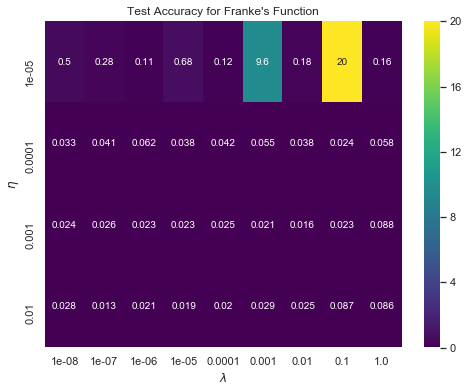




 32%|███▏      | 6/19 [05:12<12:45, 58.85s/it]

Number of epochs: 70


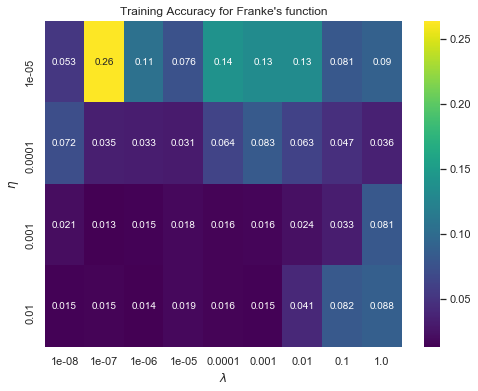

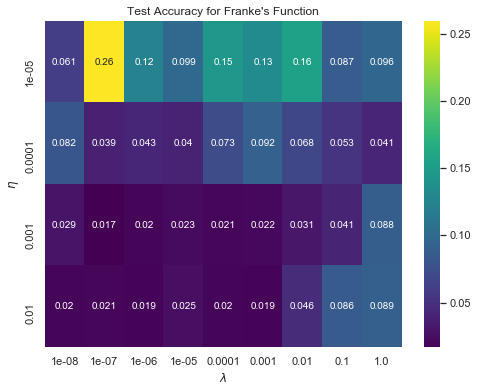




 37%|███▋      | 7/19 [06:53<14:16, 71.41s/it]

Number of epochs: 80


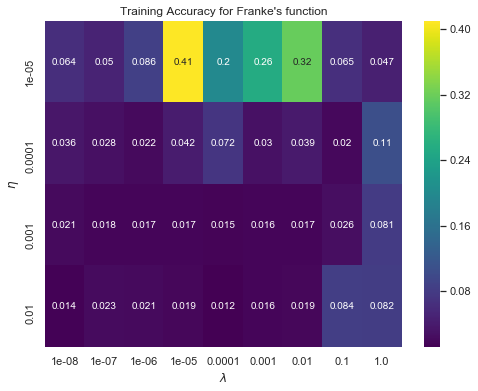

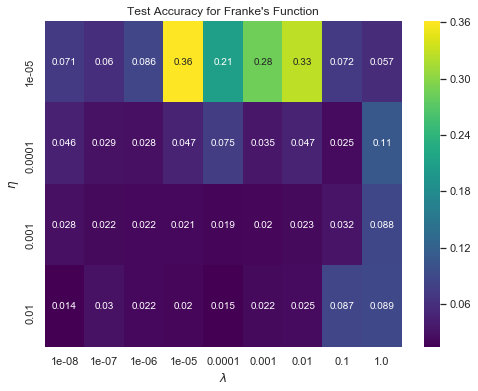




 42%|████▏     | 8/19 [08:44<15:16, 83.34s/it]

Number of epochs: 90


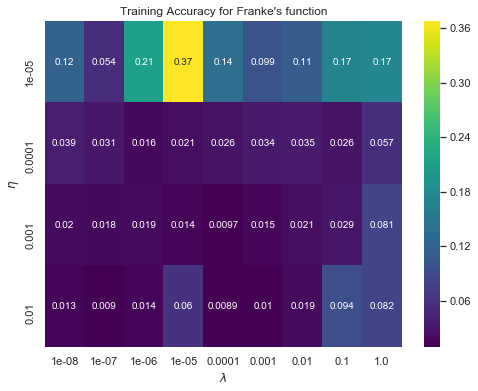

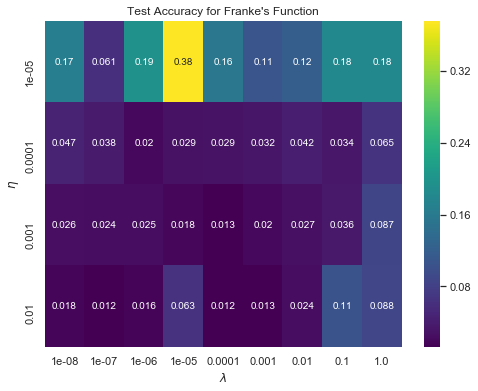




 47%|████▋     | 9/19 [11:04<16:44, 100.40s/it]

Number of epochs: 100


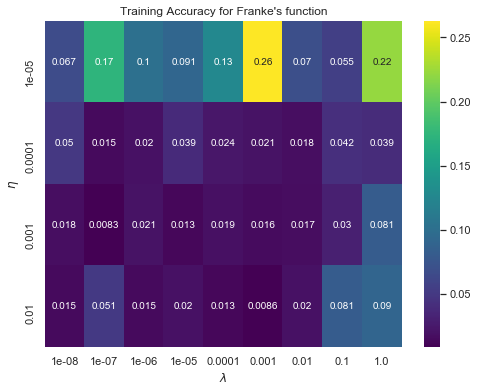

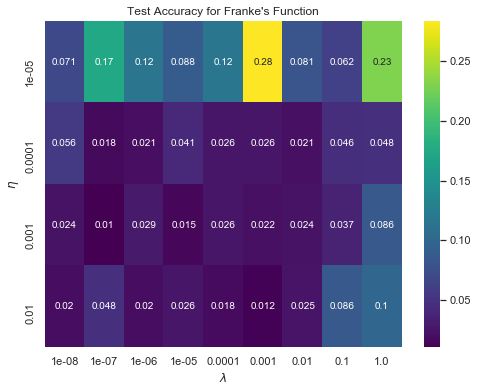




 53%|█████▎    | 10/19 [13:40<17:33, 117.00s/it]

Number of epochs: 110


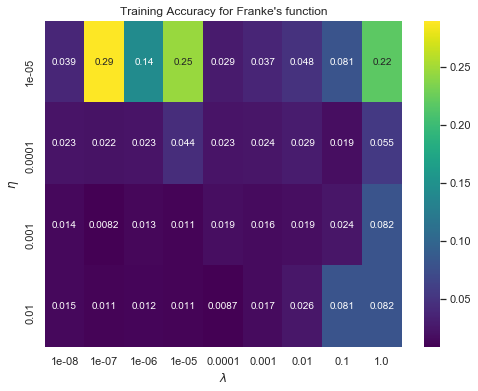

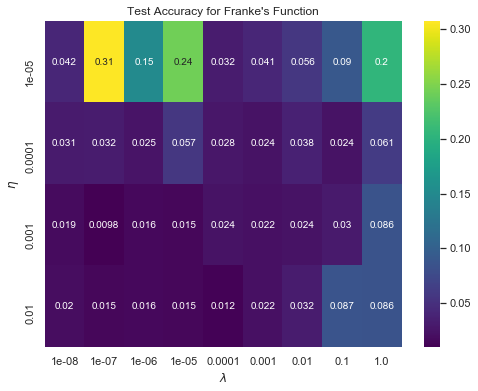




 58%|█████▊    | 11/19 [16:29<17:42, 132.77s/it]

Number of epochs: 120


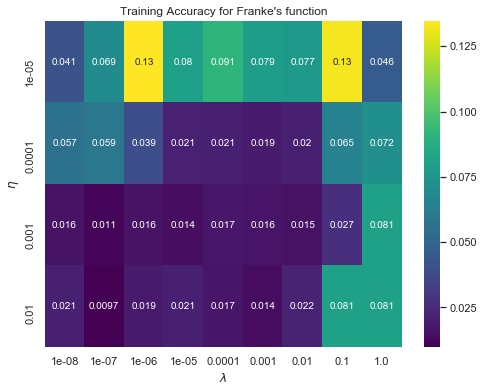

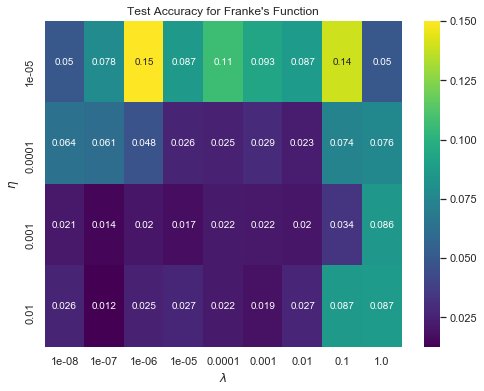




 63%|██████▎   | 12/19 [19:32<17:13, 147.64s/it]

Number of epochs: 130


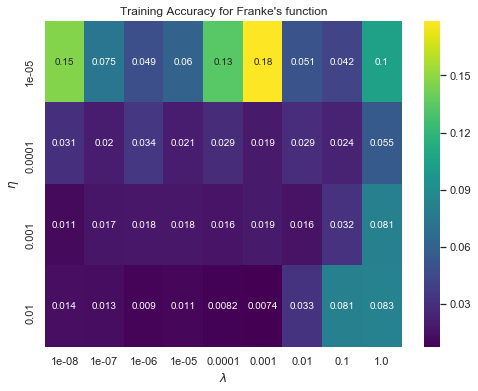

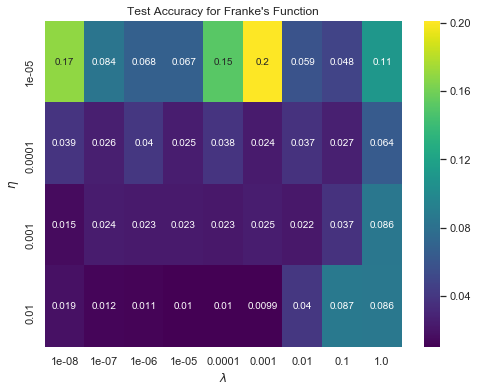




 68%|██████▊   | 13/19 [22:58<16:30, 165.08s/it]

Number of epochs: 140


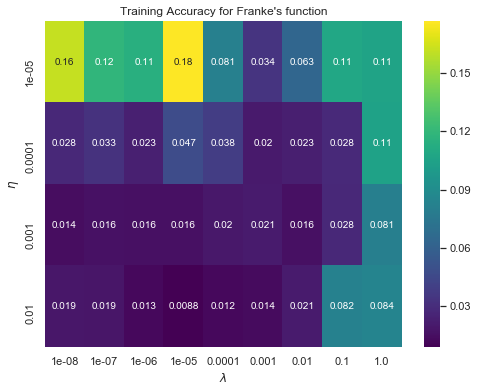

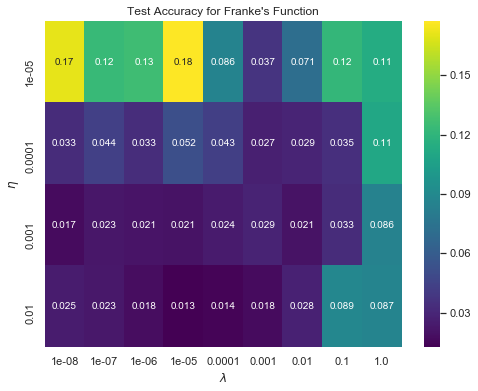




 74%|███████▎  | 14/19 [26:49<15:24, 184.90s/it]

Number of epochs: 150


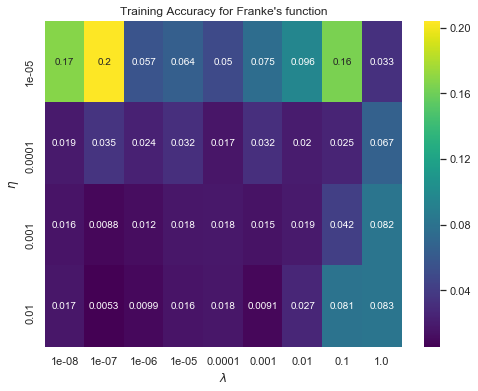

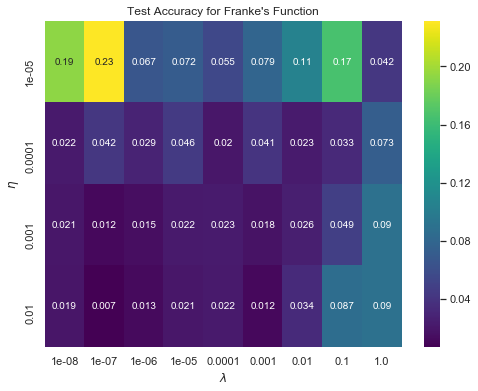




 79%|███████▉  | 15/19 [30:45<13:21, 200.41s/it]

Number of epochs: 160


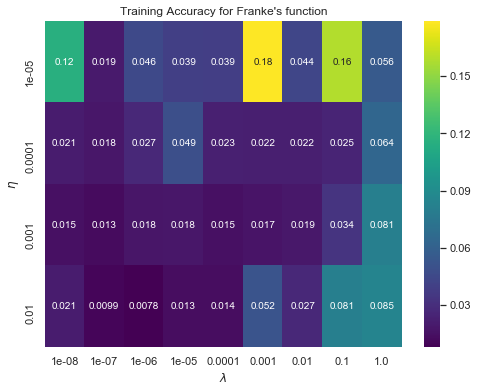

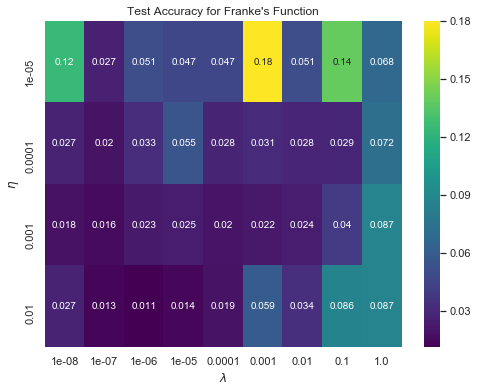




 84%|████████▍ | 16/19 [35:00<10:50, 216.81s/it]

Number of epochs: 170


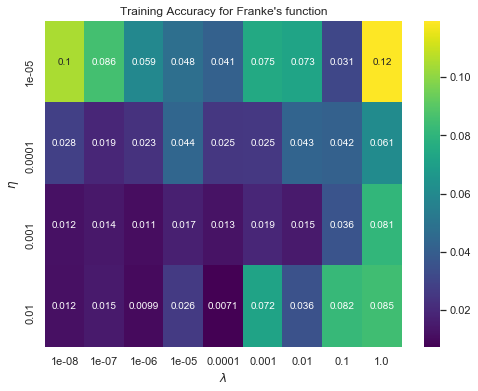

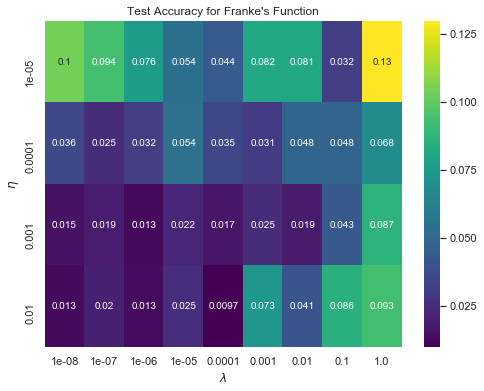




 89%|████████▉ | 17/19 [39:36<07:48, 234.34s/it]

Number of epochs: 180


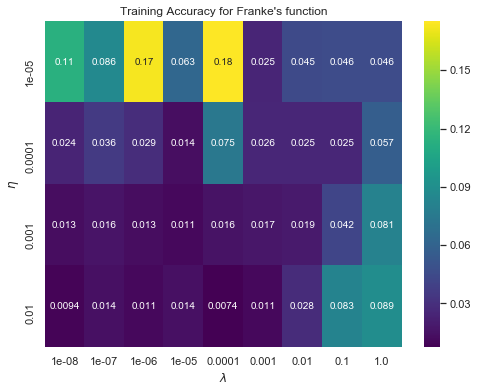

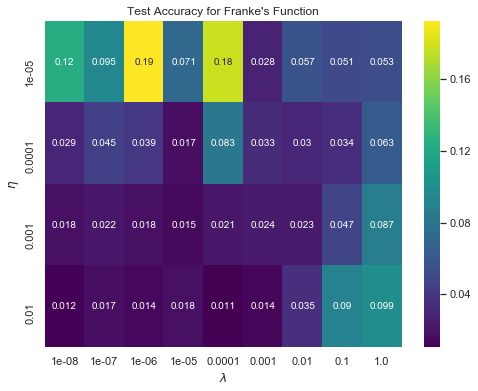




 95%|█████████▍| 18/19 [44:29<04:11, 251.93s/it]

Number of epochs: 190


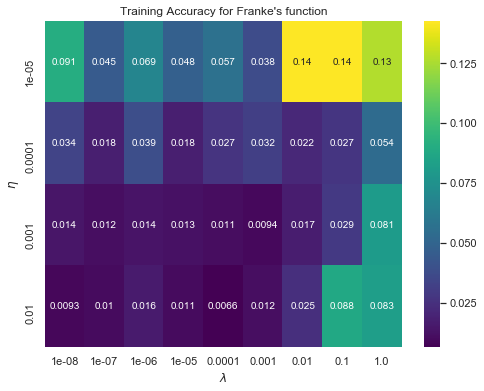

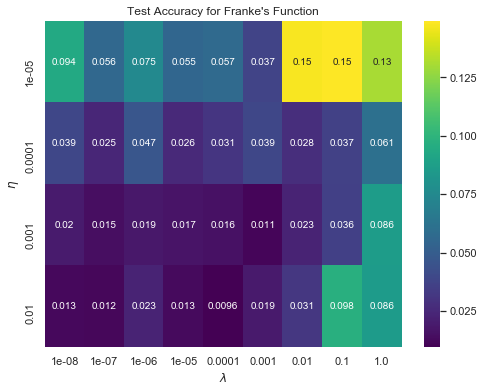




100%|██████████| 19/19 [49:20<00:00, 155.82s/it]


In [27]:
batch_size = 10
for epochs in tqdm.tqdm(range(10,200,10)):
    print ("Number of epochs:", epochs)
    run_neuralnetwork()

Finally, it is achieved a MSE as $0.007$ with number of epochs as $150$ with $\lambda=10^{-7}$ and $\eta=0.01$.

## Final model

The best parameters are summarized below and used for a final training of the network with the optimized parameters.

x ranges from 0 to 1 with a total amount of 400 points.
y ranges from 0 to 1 with a total amount of 400 points.
training network...


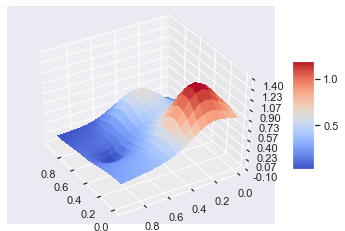

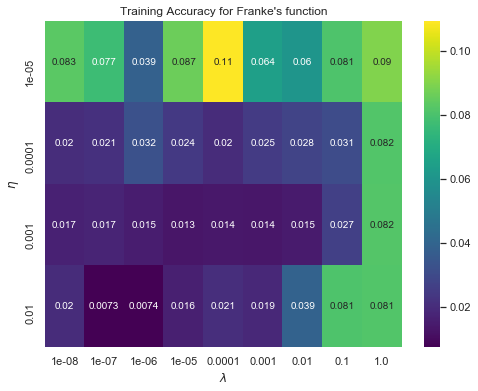

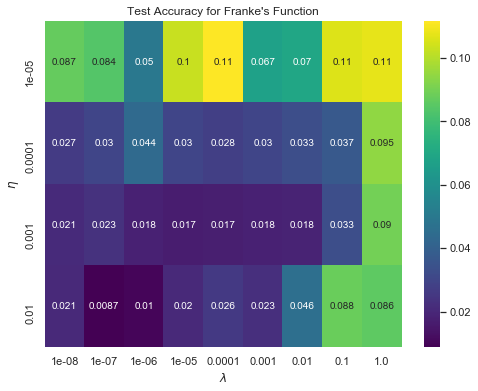

Best R$^2$ score is: 0.8985539711022834
With lmbd equal: 1e-07
With eta equal: 0.01


In [72]:
x,y,z = generate_data() #FrankeFunction
x = sigmoid(x)
y = sigmoid(y)
z = sigmoid(z)

x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,random_state=0)

z_train_inv = inv_sigmoid(z_train)
z_test_inv = inv_sigmoid(z_test)

eta_vals = np.logspace(-5, -2, 4)
lmbd_vals = np.logspace(-8, 0, 9)

#for regression these has to be 
n_categories = 1

# store the models for later use
DNN_numpy = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

epochs = 150
batch_size = 10
n_hidden_neurons = 100
n_hidden_layers = 5

X_test = find_designmatrix(x_test, y_test, polygrad = 6)
X_train = find_designmatrix(x_train, y_train, polygrad = 6)
n_inputs, n_features = X_train.shape

print("training network...")
run_neuralnetwork()

As seen, it does not neccessarily produce the same results as computed above as the algorithms are leaving the faith of our accuracy to randomness. However, we do see that we require a very good score, which might imply that the model has overall improved.  

## Scikitlearn's neural network

In [83]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import scale

x,y,z = generate_data(plott = False) #FrankeFunction

x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,random_state=0)

X_train = find_designmatrix(x_train, y_train, polygrad = 5)

X_test = find_designmatrix(x_test, y_test, polygrad = 5)

#Scaling data
X_train = scale(X_train)
z_train = scale(z_train)
X_test = scale(X_test)
z_test = scale(z_test)



dnn = MLPRegressor(hidden_layer_sizes=(100), activation='relu',
                            max_iter = 1000
                            )
dnn.fit(X_train,z_train)

#Printing lambda and eta
print("NN parameters: ")

parameters = dnn.get_params()

print (u'\u03BB =', parameters["alpha"])
print (u"\u03B7 =", parameters["learning_rate_init"])
print("R2 score on test set: ", dnn.score(X_test, z_test))
print()

x ranges from 0 to 1 with a total amount of 400 points.
y ranges from 0 to 1 with a total amount of 400 points.
NN parameters: 
λ = 0.0001
η = 0.001
R2 score on test set:  0.9479887812558452

